In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt


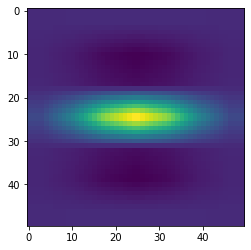

In [2]:
ksize = 7
sg = 1
th = 1*np.pi/2
ld = 1*np.pi/4
gm = 0.7
phi = 0

kernel = cv2.getGaborKernel((ksize, ksize), sg, th, ld, gm, phi)

plt.imshow(cv2.resize(kernel, (50,50)))

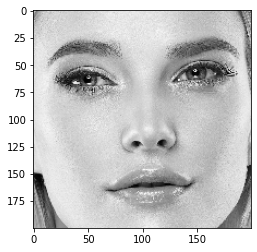

In [3]:
img= cv2.imread( "face2.jpeg", 0)
img=cv2.resize(img, (200, 200))
cv2.normalize(img, img, 0, 255, cv2.NORM_MINMAX)
df = pd.DataFrame()
# df['Original Image'] = img.reshape(-1)
plt.imshow(img, cmap='gray')

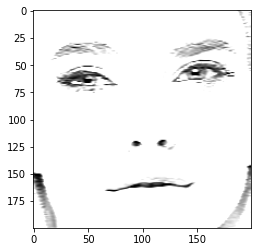

In [4]:
f_img = cv2.filter2D(img, cv2.CV_8UC3, kernel)
plt.imshow(f_img, cmap="gray")

In [5]:
kernels = []

for ang in range(8):
    th = ang /8.0 *np.pi
    for ksize in (9,11,13,15):
        ld = 1 /4.0 *np.pi
        sg = 3
        gm = 0.7
        phi = 0
        kernels.append(cv2.getGaborKernel((ksize, ksize), sg, th, ld, gm, phi))

In [6]:
num = 0
for kernel in kernels:
    g_label = "Gabor" + str(num)
    fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
    df[g_label] = fimg.reshape(-1)
    num+=1
    cv2.imwrite('filtered_images/'+g_label+'.jpg', fimg)

NameError: name 'num' is not defined